In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io
from skimage import color

from skimage.filters import try_all_threshold
from skimage.filters import threshold_isodata
from skimage.filters import threshold_li
from skimage.filters import threshold_mean
from skimage.filters import threshold_minimum
from skimage.filters import threshold_otsu
from skimage.filters import threshold_triangle
from skimage.filters import threshold_yen

In [2]:
# Loading 1 sample image
image = io.imread('../images_lesions_positive_for_thresholding/25KE_OCMR+.jpg')
image = color.rgb2gray(image)

Text(0.490334375, 50000, 'Yen')

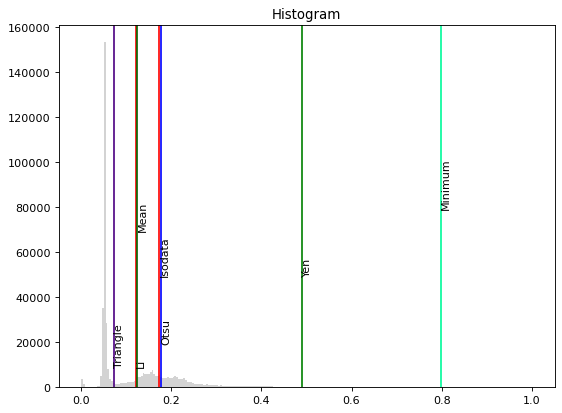

In [3]:
# Visualising thresholds on histogram

thresh_isodata = threshold_isodata(image)
thresh_li = threshold_li(image)
thresh_mean = threshold_mean(image)
thresh_minimum = threshold_minimum(image)
thresh_otsu = threshold_otsu(image)
thresh_triangle = threshold_triangle(image)
thresh_yen = threshold_yen(image)

plt.figure(figsize=(8, 6), dpi=80)
plt.hist(image.ravel(), bins=256,color='lightgrey')
plt.title('Histogram')
plt.axvline(thresh_isodata,color='red')
plt.text(thresh_isodata+0.0001,50000,'Isodata',rotation=90)
plt.axvline(thresh_li,color='red')
plt.text(thresh_li+0.0001,10000,'Li',rotation=90)
plt.axvline(thresh_mean,color='darkgreen')
plt.text(thresh_mean+0.0001,70000,'Mean',rotation=90)
plt.axvline(thresh_minimum,color='mediumspringgreen')
plt.text(thresh_minimum+0.0001,80000,'Minimum',rotation=90)
plt.axvline(thresh_otsu,color='blue')
plt.text(thresh_otsu+0.0001,20000,'Otsu',rotation=90)
plt.axvline(thresh_triangle,color='indigo')
plt.text(thresh_triangle+0.0001,10000,'Triangle',rotation=90)
plt.axvline(thresh_yen,color='green')
plt.text(thresh_yen+0.0001,50000,'Yen',rotation=90)


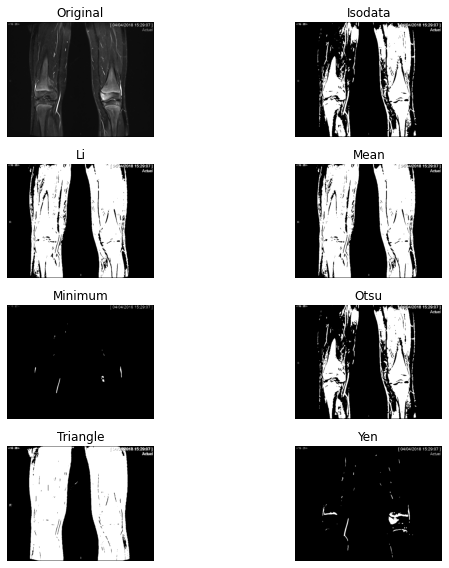

In [4]:
# Exploring the thresholds visually

# Visually, it appears that the Yen threshold appears to correspond best with what we think are lesions

fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)

plt.show()

In [5]:
# Loading all images for processing
import os

for directory, subdirectories, files in os.walk("../images_lesions_positive_for_thresholding"):

    image_list = []
    for file in files:
        image = io.imread(directory+'/'+file)
        image = color.rgb2gray(image)
        image_list.append(image)
        
#plt.imshow(image_list[0],cmap='gray')
#print(image_list[0].shape)

Image index: 0


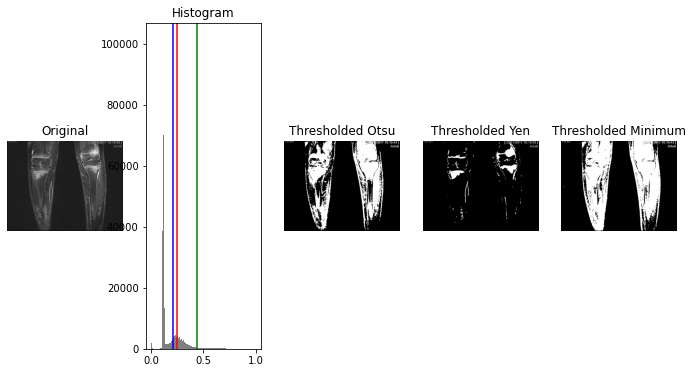

Image index: 1


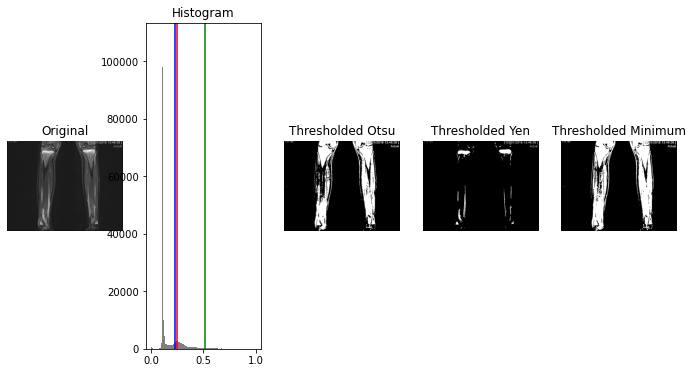

Image index: 2


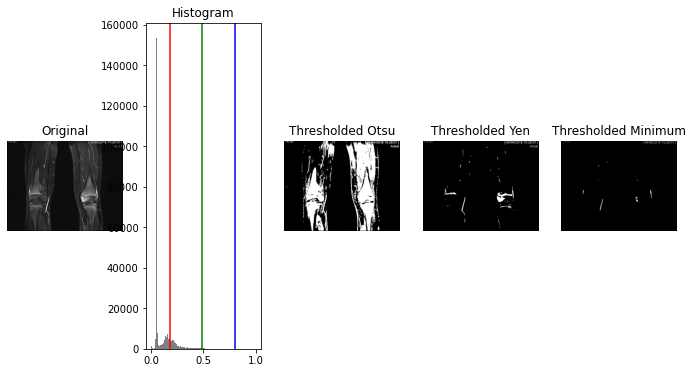

Image index: 3


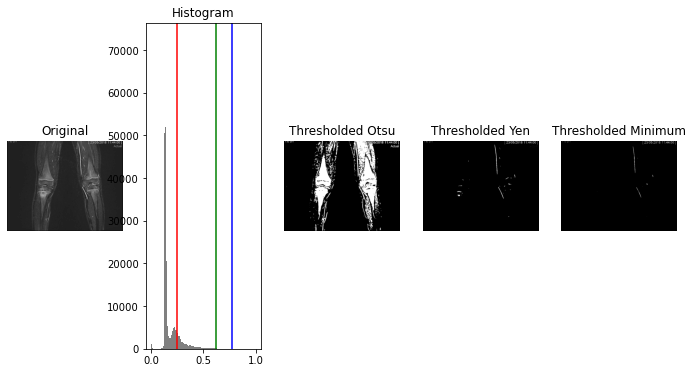

Image index: 4


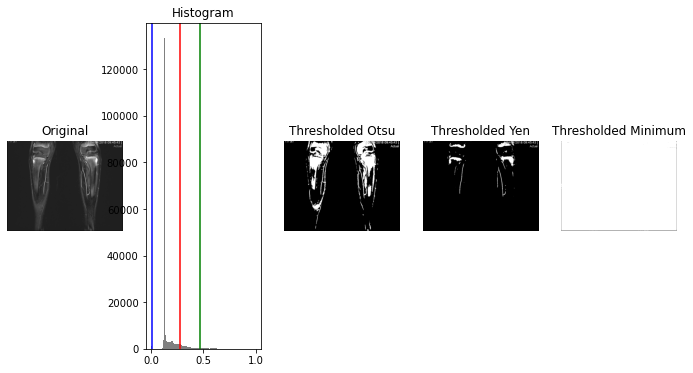

Image index: 5


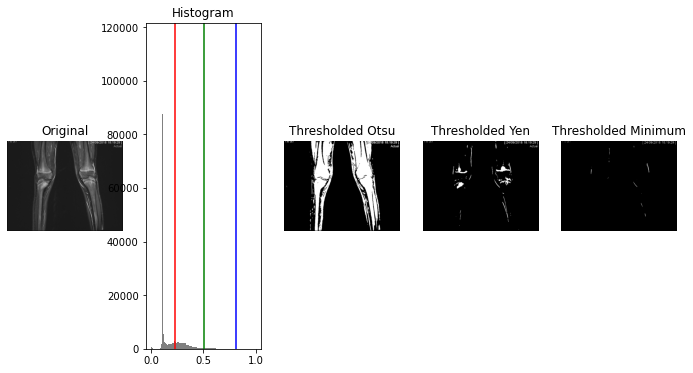

Image index: 6


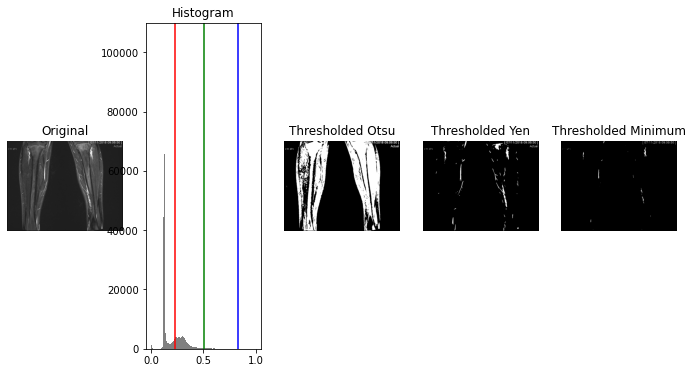

Image index: 7


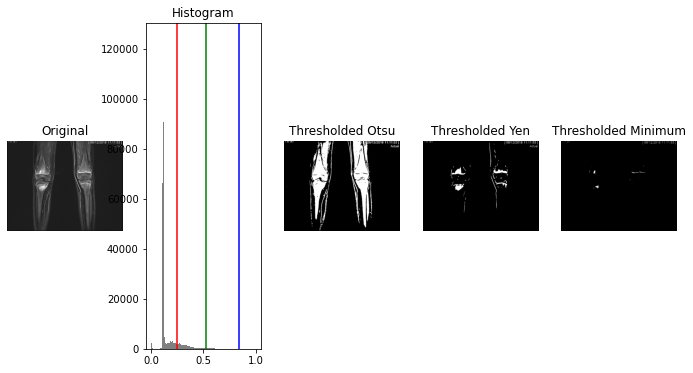

Image index: 8


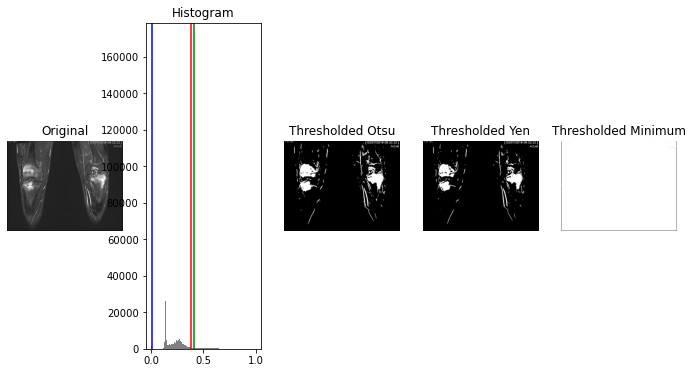

Image index: 9


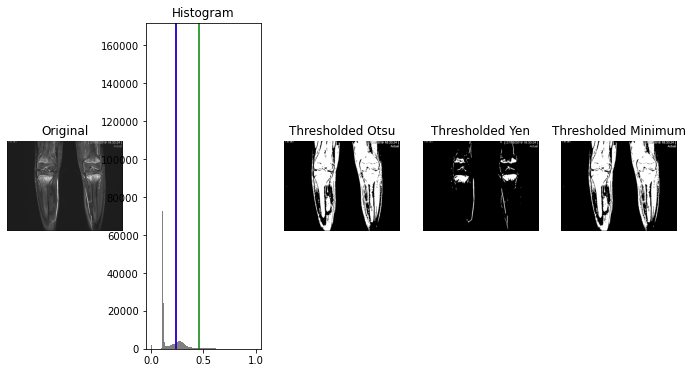

Image index: 10


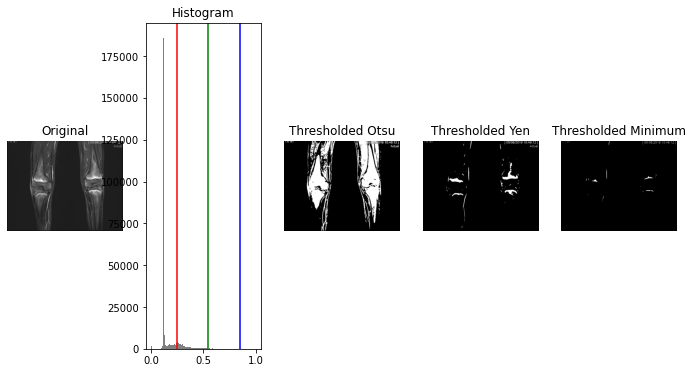

Image index: 11


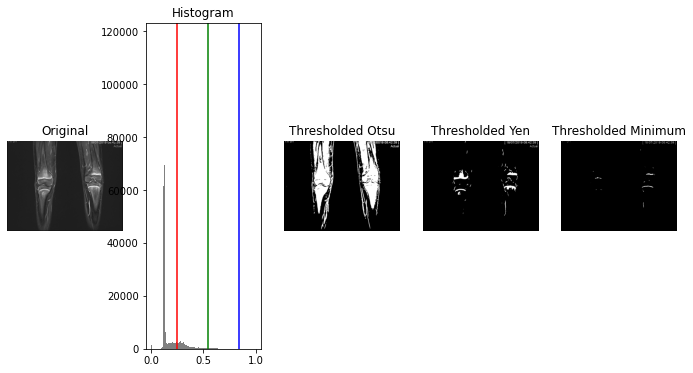

Image index: 12


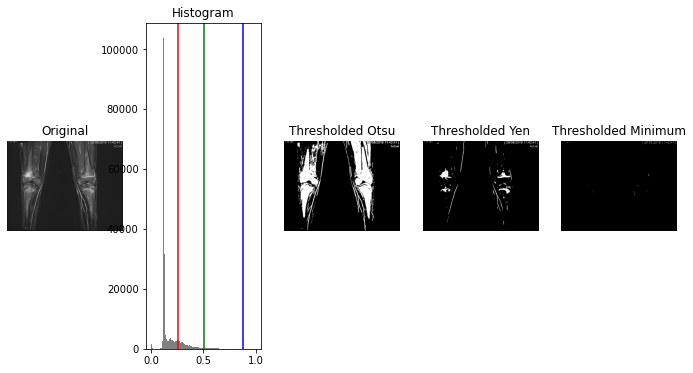

Image index: 13


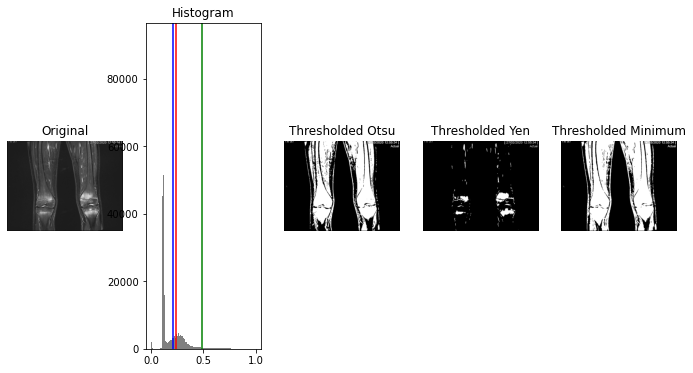

Image index: 14


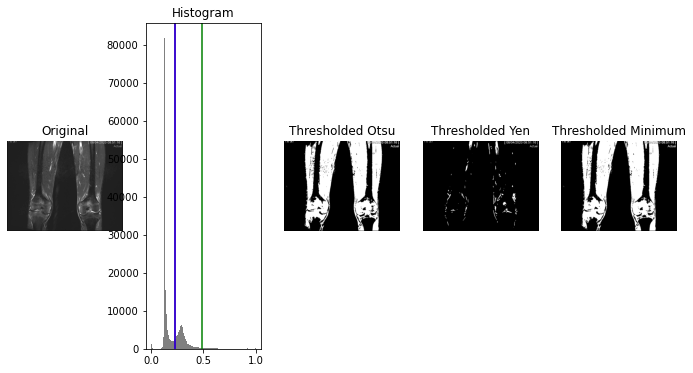

Image index: 15


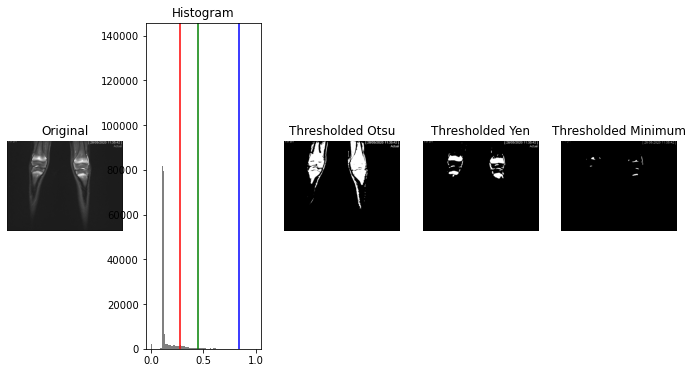

Image index: 16


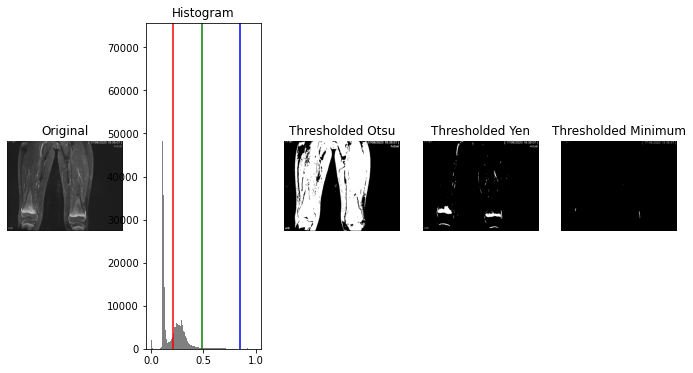

Image index: 17


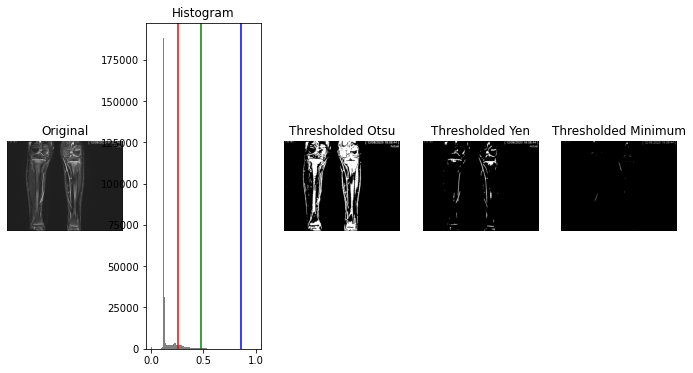

Image index: 18


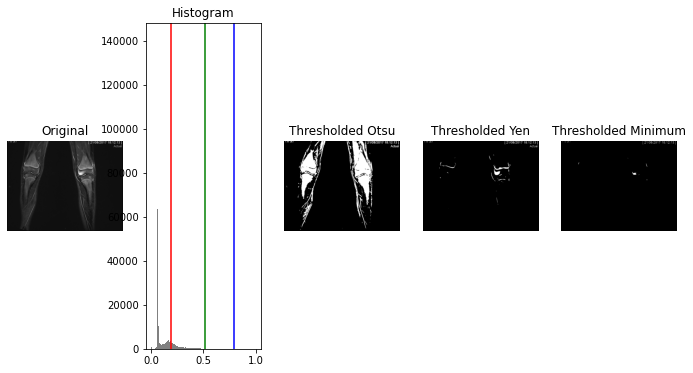

Image index: 19


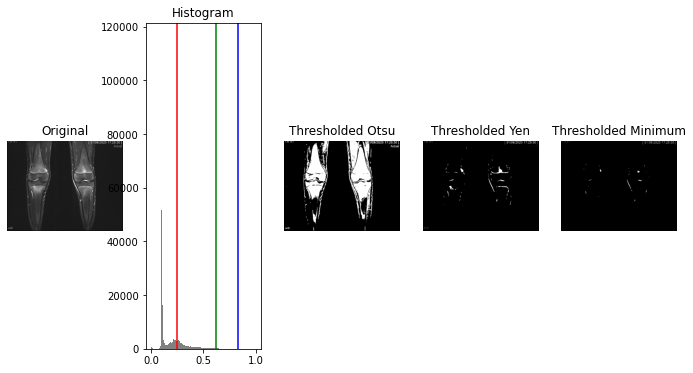

Image index: 20


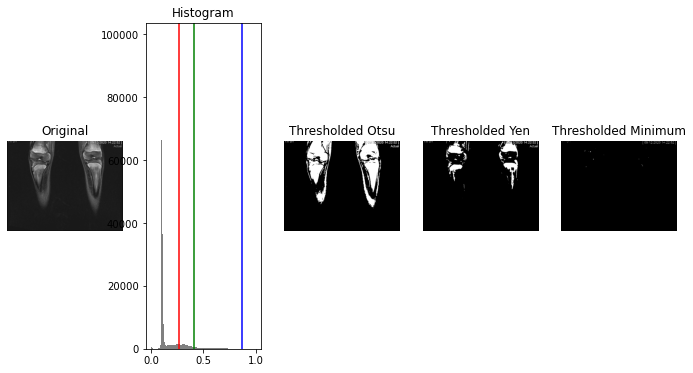

Image index: 21


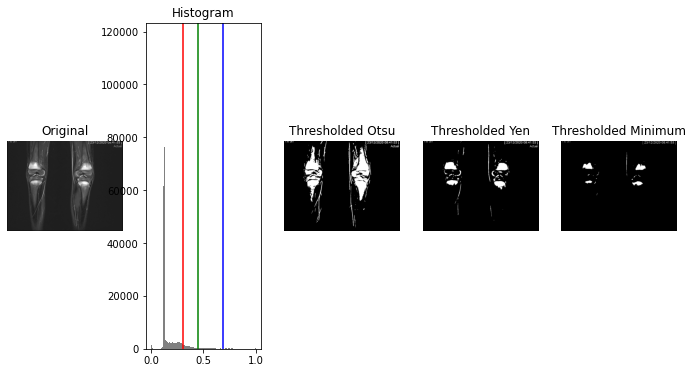

Image index: 22


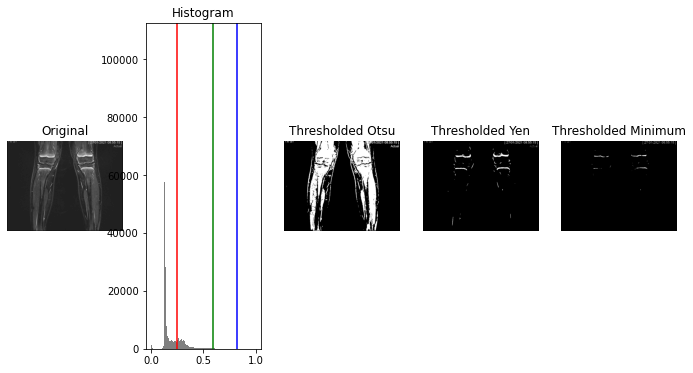

Image index: 23


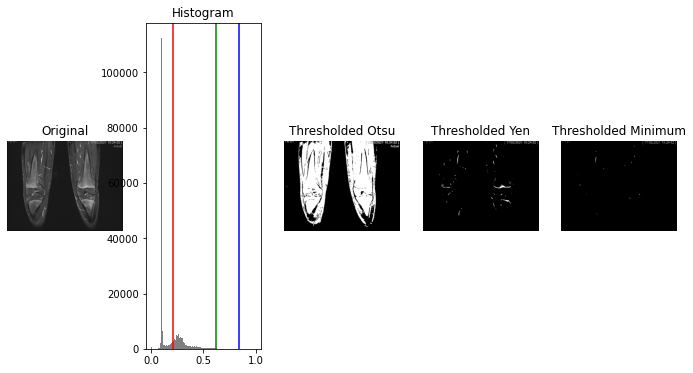

In [6]:
# Qualitative comparison between original, otsu-thresholded, yen-thresholded, and minimum thresholded
# Yen threshold appears to give the best results overall

image_id = 0
for img in image_list:
    thresh_otsu = threshold_otsu(img)
    thresh_yen = threshold_yen(img)
    thresh_minimum = threshold_minimum(img)
    binary_otsu = img > thresh_otsu
    binary_yen = img > thresh_yen
    binary_minimum = img > thresh_minimum
    
    print("Image index:",image_id)
    fig, axes = plt.subplots(ncols=5, figsize=(12, 6))
    ax = axes.ravel()

    ax[0] = plt.subplot(1, 5, 1)
    ax[1] = plt.subplot(1, 5, 2)
    ax[2] = plt.subplot(1, 5, 3, sharex=ax[0], sharey=ax[0])
    ax[3] = plt.subplot(1, 5, 4, sharex=ax[0], sharey=ax[0])
    ax[4] = plt.subplot(1, 5, 5, sharex=ax[0], sharey=ax[0])

    ax[0].imshow(img, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[0].axis('off')

    ax[1].hist(img.ravel(), bins=256,color='grey')
    ax[1].set_title('Histogram')
    ax[1].axvline(thresh_otsu, color='r')
    ax[1].axvline(thresh_yen, color='g')
    ax[1].axvline(thresh_minimum, color='b')
    
    ax[2].imshow(binary_otsu,cmap=plt.cm.gray)
    ax[2].set_title('Thresholded Otsu')
    ax[2].axis('off')
    
    ax[3].imshow(binary_yen,cmap=plt.cm.gray)
    ax[3].set_title('Thresholded Yen')
    ax[3].axis('off')
    
    ax[4].imshow(binary_minimum,cmap=plt.cm.gray)
    ax[4].set_title('Thresholded Minimum')
    ax[4].axis('off')

    plt.show()
    image_id = image_id+1

In [7]:
x = np.zeros((3,3))
print(x)

for i in range(3):
    x[i,:] = i
    
print(x)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [8]:
def introduceLabel(contour, labels, false_color=0):
    # takes in an RBG contour image and a binary label
    # returns an RGB label
    x1,y1,z1 = contour.shape
    x2,y2 = labels.shape
    
    # Check and return error if needed
    
    tot_pixel = x1*y1
    
    im_bg = np.zeros((tot_pixel,3))
    im_bg = contour.reshape(tot_pixel,3)
    im_label = np.zeros((tot_pixel))
    im_label = labels.reshape(tot_pixel)
    
    for i in range(tot_pixel):
        if im_label[i] == 1:
            im_bg[i,0] = 255
            im_bg[i,1] = 0
            im_bg[i,2] = 0
    
    im_bg = im_bg.reshape(x1,y1,3)
    return im_bg

def binary2rgb(im_bin):
    x,y = im_bin.shape
    tot_pixel = x*y
    im_bin = im_bin.reshape(tot_pixel)
    im_rgb = np.zeros((tot_pixel,3))
    for i in range(tot_pixel):
        if im_bin[i] == False:
            im_rgb[i,:] = 0
        else:
            im_rgb[i,:] = 1
    im_rgb = im_rgb.reshape(x,y,3)        
    return im_rgb

Image index: 0


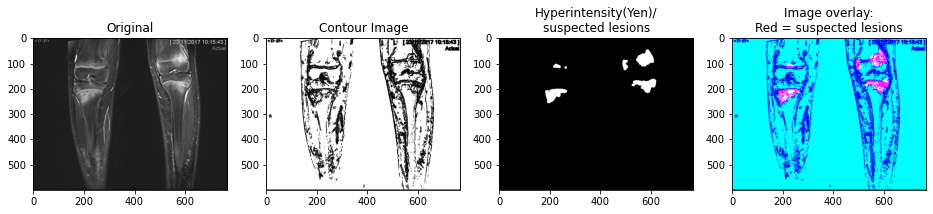

Image index: 1


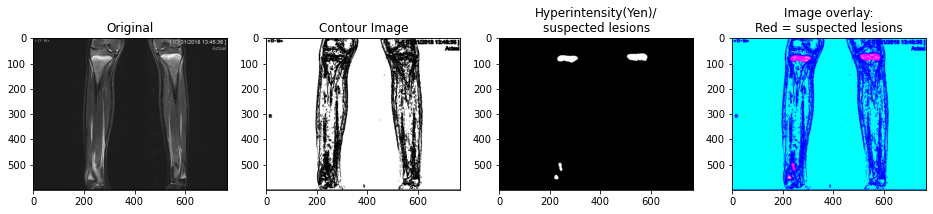

Image index: 2


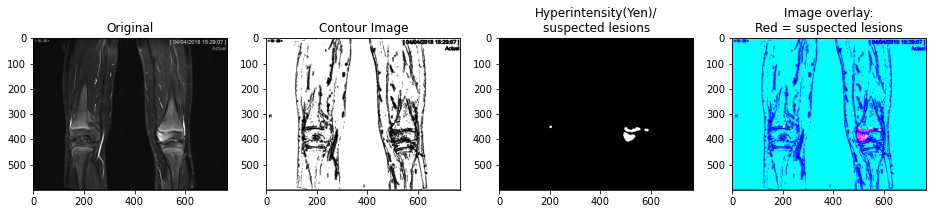

Image index: 3


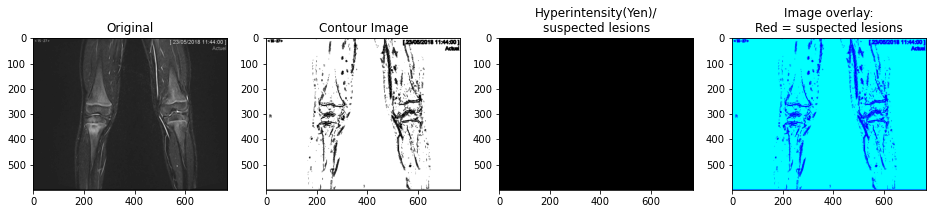

Image index: 4


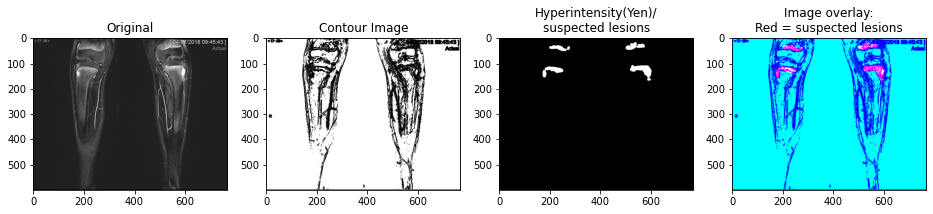

Image index: 5


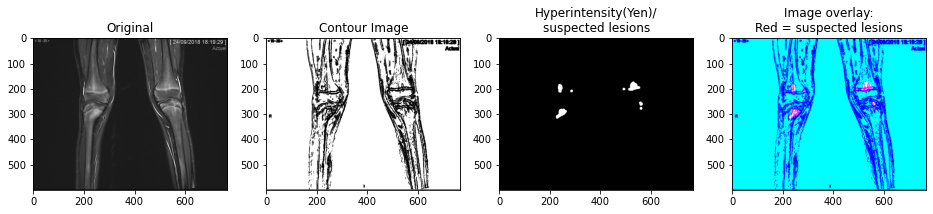

Image index: 6


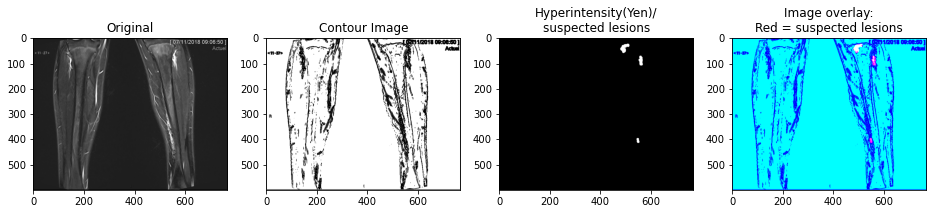

Image index: 7


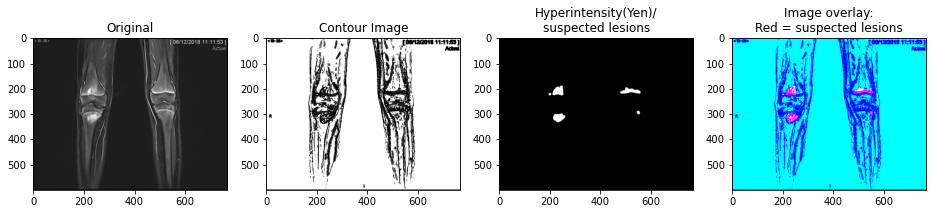

Image index: 8


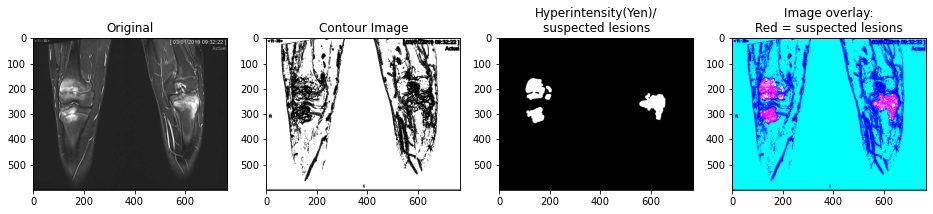

Image index: 9


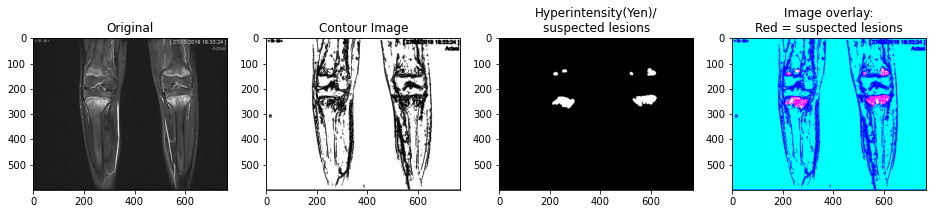

Image index: 10


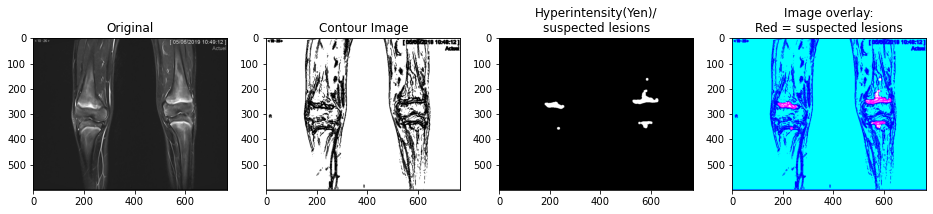

Image index: 11


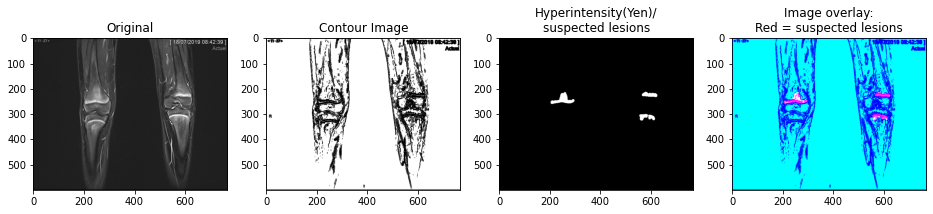

Image index: 12


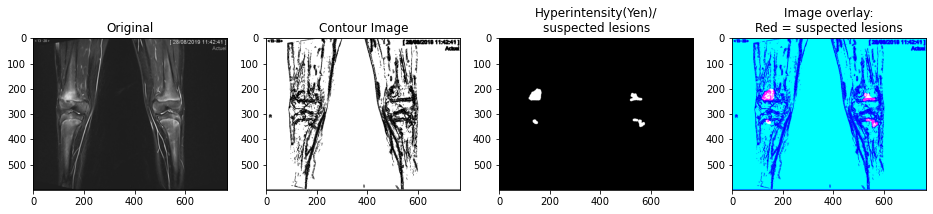

Image index: 13


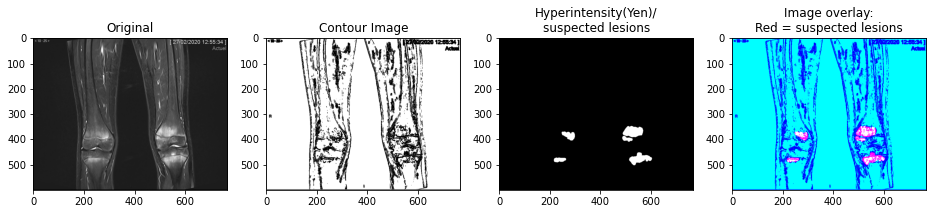

Image index: 14


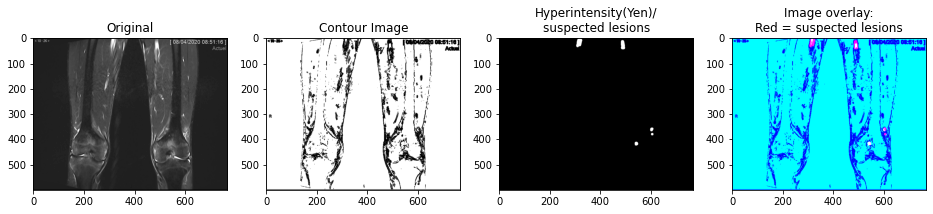

Image index: 15


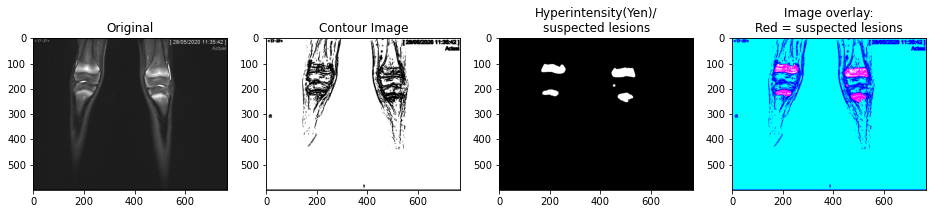

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Image index: 16


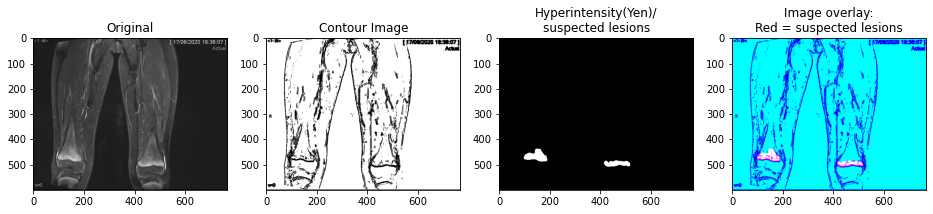

Image index: 17


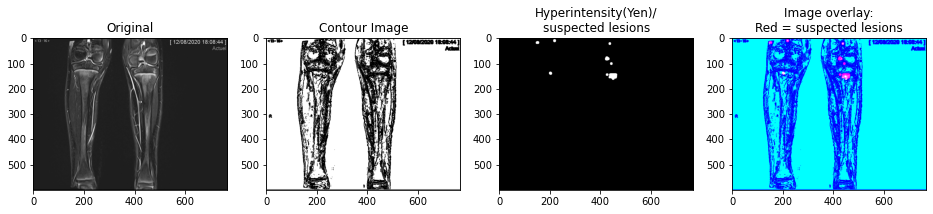

Image index: 18


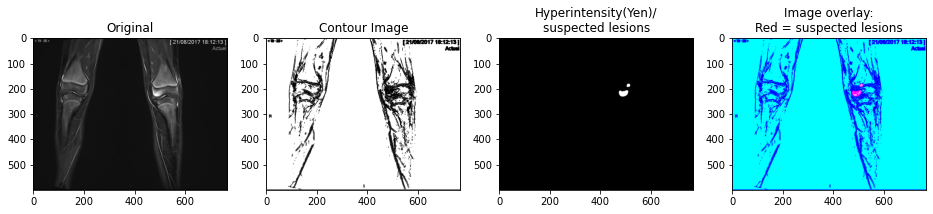

Image index: 19


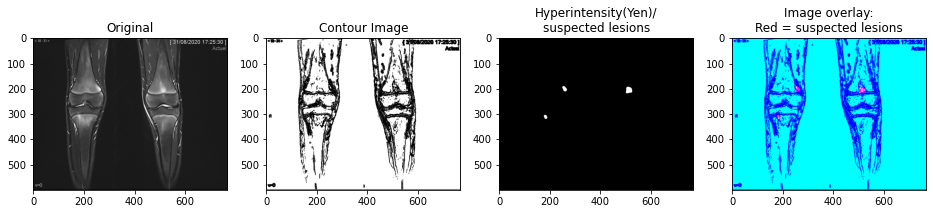

Image index: 20


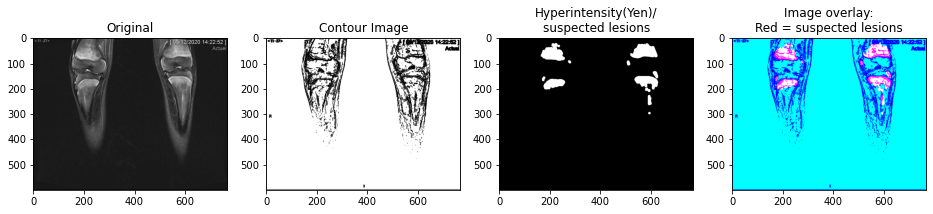

Image index: 21


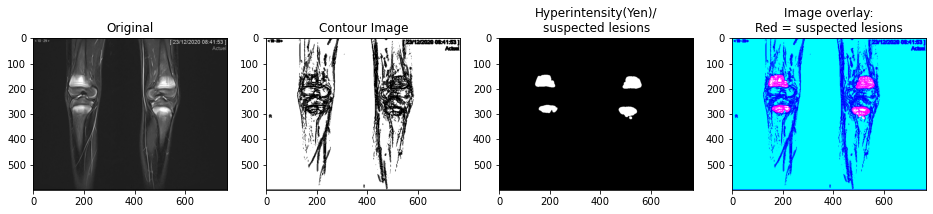

Image index: 22


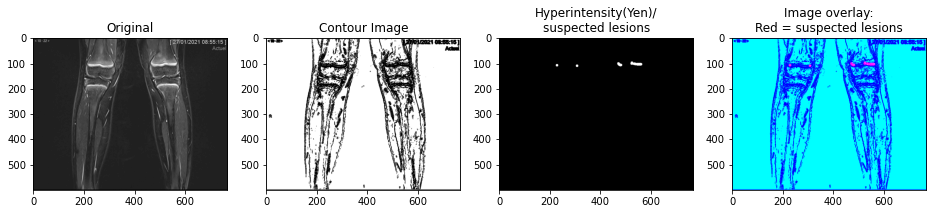

Image index: 23


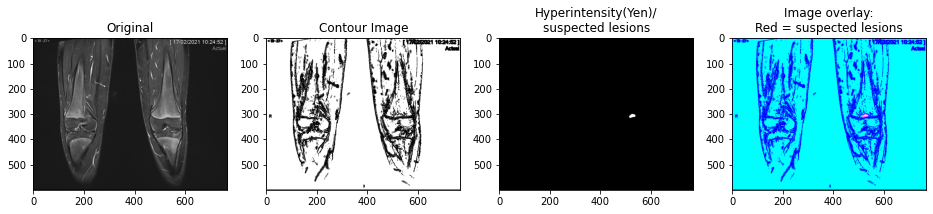

In [23]:
from skimage.filters import threshold_local
from skimage.filters import sobel
from skimage.filters import median

from skimage.measure import label

from skimage.morphology import disk
from skimage.morphology import opening,closing,disk

from skimage import util 
from skimage.color import label2rgb

# Zoom-in for comparison between original, Yen-thresholded and overlay images

block_size = 3

image_id = 0

for img in image_list:
    
    thresh_yen = threshold_yen(img)
    
    # opening used to remove line artifacts
    binary_yen = opening(img > thresh_yen,disk(5))   
    
    yen_red = np.zeros((img.shape[0],img.shape[1]))
    yen_red[:,:] = binary_yen*255

    contour_im = sobel(img)
    thresh = threshold_triangle(contour_im)

    outline_binary = contour_im > thresh
    outline_binary_neg = util.invert(outline_binary)
    
    x,y = img.shape
    overlay_rgb = np.ones((x,y,3))
    overlay_rgb[:,:,0] = binary_yen
    overlay_rgb[:,:,1] = outline_binary_neg

    print("Image index:",image_id)
    
    fig, axes = plt.subplots(ncols=4, figsize=(16, 10))
    ax = axes.ravel()
    
    ax[0] = plt.subplot(1, 4, 1)
    ax[1] = plt.subplot(1, 4, 2)
    ax[2] = plt.subplot(1, 4, 3)
    ax[3] = plt.subplot(1, 4, 4)
    
    ax[0].imshow(img,cmap=plt.cm.gray)
    ax[0].set_title('Original')
    
    ax[1].imshow(outline_binary_neg,cmap=plt.cm.gray)
    ax[1].set_title('Contour Image')
    
    ax[2].imshow(binary_yen,cmap=plt.cm.gray)
    ax[2].set_title('Hyperintensity(Yen)/\nsuspected lesions')
        
    ax[3].imshow(overlay_rgb,cmap=plt.cm.gray)
    #ax[3].imshow(mask_yen,cmap=plt.cm.gray)
    ax[3].set_title('Image overlay:\nRed = suspected lesions')
    
    plt.show()
    
    if image_id == 15:
        io.imsave('area_detection_try1.jpg', overlay_rgb)
    
    image_id=image_id+1